# Driver do eksperymentu

In [1]:
from models.tda_models import TDA_PI34_Model, TDA_PI42_Model, VECTOR_STITCHING_PI_Model_34, VECTOR_STITCHING_PI_Model_42
from models.raw_models import Raw_Model, Dummy_Model
from data_preprocessing import process_mnist_alike
from sklearn.metrics import confusion_matrix
import numpy as np
import tensorflow as tf


In [2]:
# models

raw_model = Raw_Model() # cnn models working on raw images
tda_model_34 = TDA_PI34_Model() # cnn model working on persistance images
vector_stitching_model_34 = VECTOR_STITCHING_PI_Model_34() # cnn model working on stitched raw and PI images


In [3]:
# 10 example indices for tests

indices = [
    ((31081, 31181), (47635, 47735))
]

indices100 = [
    ((8028, 8128), (2237, 2337)),
    ((31081, 31181), (47635, 47735)),
    ((51438, 51538), (24766, 24866)),
    ((32427, 32527), (36258, 36358)),
    ((0, 100), (17901, 18001)),
    ((49216, 49316), (13836, 13936)),
    ((51207, 51307), (100, 200)),
    ((48137, 48237), (57296, 57396)),
    ((1000, 1100), (59758, 59858)),
    ((29740, 29840), (17885, 17985))
]

indices250 = [
    ((8028, 8278), (2237, 2337)),
    ((31081, 31331), (47635, 47735)),
    ((51438, 51688), (24766, 24866)),
    ((32427, 32677), (36258, 36358)),
    ((0, 250), (17901, 18001)),
    ((49216, 49466), (13836, 13936)),
    ((51207, 51457), (100, 200)),
    ((48137, 48387), (57296, 57396)),
    ((1000, 1250), (59758, 59858)),
    ((29740, 29990), (17885, 17985))
]

indices500 = [
    ((8028, 8528), (2237, 2337)),
    ((31081, 31581), (47635, 47735)),
    ((51438, 51938), (24766, 24866)),
    ((32427, 32927), (36258, 36358)),
    ((0, 500), (17901, 18001)),
    ((49216, 49716), (13836, 13936)),
    ((51207, 51707), (100, 200)),
    ((48137, 48637), (57296, 57396)),
    ((1000, 1500), (59758, 59858)),
    ((29740, 30240), (17885, 17985))
]


indices1000 = [
    ((8028, 9028), (2237, 2337)),
    ((31081, 32081), (47635, 47735)),
    ((51438, 52438), (24766, 24866)),
    ((32427, 33427), (36258, 36358)),
    ((0, 1000), (17901, 18001)),
    ((49216, 50216), (13836, 13936)),
    ((51207, 52207), (100, 200)),
    ((48137, 49137), (57296, 57396)),
    ((1000, 2000), (59758, 59858)),
    ((29740, 30740), (17885, 17985))
]





In [ ]:
# for 90/10 data



(X, y), _ = tf.keras.datasets.mnist.load_data()

tda_history = []
raw_history = []
vector_stitching_history = []
j=0
_verbose = 0
early_stopping_tda = 7
early_stopping_raw = 7
early_stopping_vector_stitching = 7

for i in indices100:
    data = process_mnist_alike(data=(X,y), training_indices=i[0], testing_indices=i[1], dist_ratio=10)
    
    #TDA model
    #early stopping
    tf.keras.backend.clear_session()
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=early_stopping_tda, restore_best_weights=True)
    tda_model_34.model.fit(data["X_tr_tda_34"], data["y_tr_tda_34"], epochs=30, batch_size=1, validation_data=(data["X_test_noisy_tda_good_34"], data["y_test"]), callbacks=[early_stopping], verbose=_verbose)
    #print the best validation accuracy
    print("krok: ", j)
    print("Best validation accuracy for TDA model 34: \t", max(tda_model_34.model.history.history['val_accuracy']))
    tda_history.append(max(tda_model_34.model.history.history['val_accuracy']))
    #save all epochs history
    #tda_history.append(tda_model_34.model.history)


    # RAW model
    tf.keras.backend.clear_session()
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=early_stopping_raw, restore_best_weights=True)
    raw_model.model.fit(data["X_tr"], data["y_tr"], epochs=20, batch_size=1, validation_data=(data["X_test_noisy_random"], data["y_test"]), callbacks=[early_stopping], verbose=_verbose)
    print("Best validation accuracy for RAW model: \t", max(raw_model.model.history.history['val_accuracy']))
    raw_history.append(max(raw_model.model.history.history['val_accuracy']))



    #Vector stitching model
    tf.keras.backend.clear_session()
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=early_stopping_vector_stitching, restore_best_weights=True)
    vector_stitching_model_34.model.fit(data["X_tr_vector_stitching_34"], data["y_tr_vector_stitching_34"], epochs=20, batch_size=1, validation_data=(data["X_test_noisy_vector_stitching_good_34"], data["y_test"]), callbacks=[early_stopping], verbose=_verbose)
    print("Best validation accuracy for VS model 34: \t", max(vector_stitching_model_34.model.history.history['val_accuracy']))
    vector_stitching_history.append(max(vector_stitching_model_34.model.history.history['val_accuracy']))
    



    
    #reload models
    raw_model = Raw_Model() # cnn models working on raw images
    tda_model_34 = TDA_PI34_Model() # cnn model working on persistance images
    vector_stitching_model_34 = VECTOR_STITCHING_PI_Model_34() # cnn model working on stitched raw and PI images

    
    j=j+1

VS model digits accuracy:
4/4 [==============================] - 0s 12ms/step


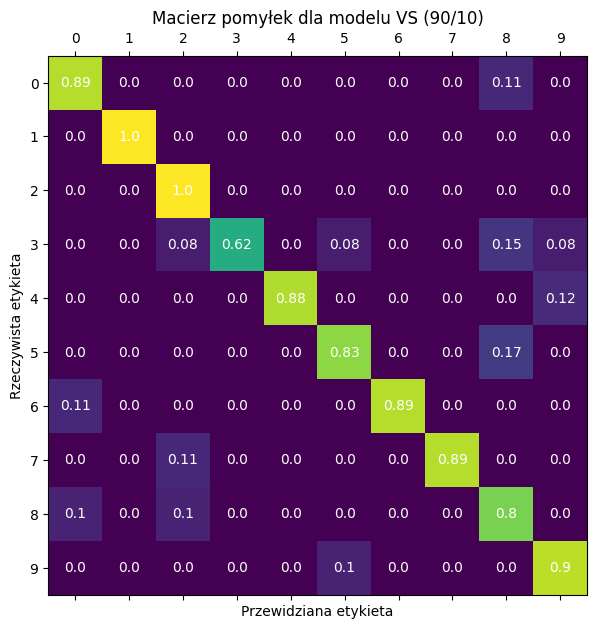

-------------------------------------------

RAW model digits accuracy:
4/4 [==============================] - 0s 5ms/step


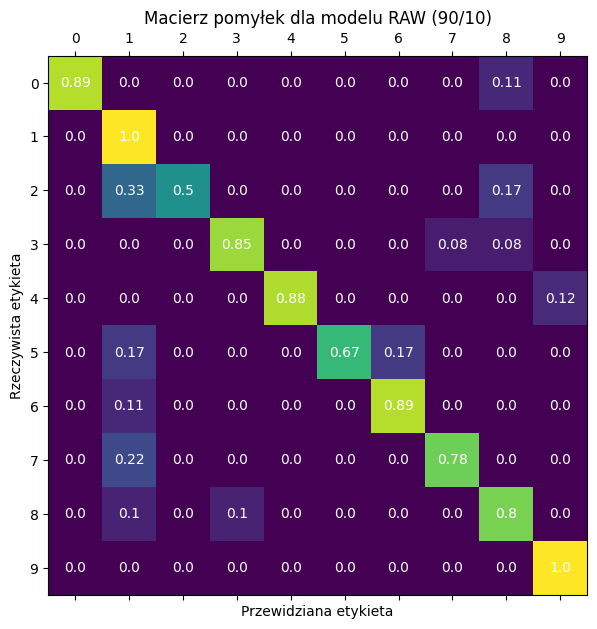

-------------------------------------------

TDA model digits accuracy:
4/4 [==============================] - 0s 4ms/step


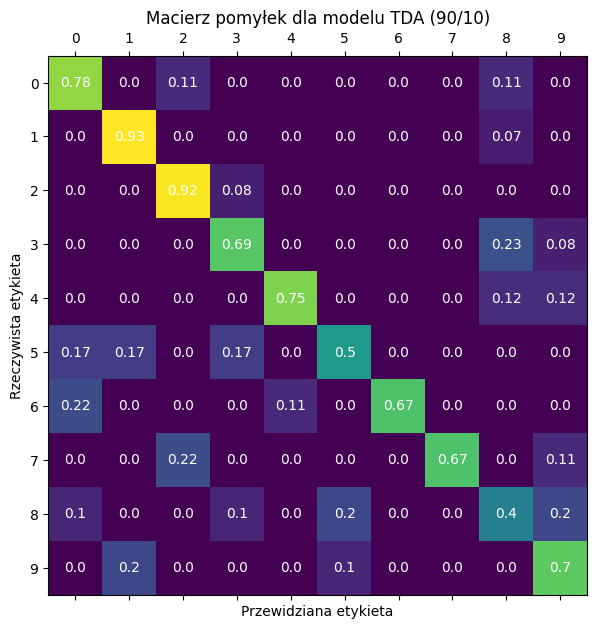

-------------------------------------------


In [54]:
# in order to use this piece of code, break the loop when training models to avoid reloading models at the end
# this is important because we want to be able to predict using trained models

import matplotlib.pyplot as plt

print("VS model digits accuracy:")

# Make predictions on the test set
y_pred = vector_stitching_model_34.model.predict(data["X_test_noisy_vector_stitching_good_34"])

# Convert predictions and true labels back to integers
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = data["y_test"]

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

    # Calculate accuracy for each digit
accuracy_per_digit = conf_matrix.diagonal() / conf_matrix.sum(axis=1)


c2mat = np.zeros_like(conf_matrix, dtype=float)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        c2mat[i, j] = round(conf_matrix[i, j] / conf_matrix[i,:].sum(), 2)

#show c2mat as matplotlib figure, name axes
fig, ax = plt.subplots(figsize=(7, 7))
ax.matshow(c2mat)
plt.title("Macierz pomyłek dla modelu VS (90/10)")
plt.ylabel("Rzeczywista etykieta")
plt.xlabel("Przewidziana etykieta")
plt.xticks(range(10))
plt.yticks(range(10))
# for each entry in the confusion matrix, print the number of percentace of correct predictions
for i in range(c2mat.shape[0]):
    for j in range(c2mat.shape[1]):
        plt.text(j, i, round(c2mat[i, j], 2), ha="center", va="center", color="white")

plt.show()


print("-------------------------------------------")

print("\nRAW model digits accuracy:")
# the same digit by digit check for raw and tda models
y_pred = raw_model.model.predict(data["X_test_noisy_random"])
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = data["y_test"]
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
accuracy_per_digit = conf_matrix.diagonal() / conf_matrix.sum(axis=1)

c2mat = np.zeros_like(conf_matrix, dtype=float)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        c2mat[i, j] = round(conf_matrix[i, j] / conf_matrix[i,:].sum(), 2)

#show c2mat as matplotlib figure, name axes
fig, ax = plt.subplots(figsize=(7, 7))
ax.matshow(c2mat)
plt.title("Macierz pomyłek dla modelu RAW (90/10)")
plt.ylabel("Rzeczywista etykieta")
plt.xlabel("Przewidziana etykieta")
plt.xticks(range(10))
plt.yticks(range(10))
# for each entry in the confusion matrix, print the number of percentace of correct predictions
for i in range(c2mat.shape[0]):
    for j in range(c2mat.shape[1]):
        plt.text(j, i, round(c2mat[i, j], 2), ha="center", va="center", color="white")

plt.show()

print("-------------------------------------------")

print("\nTDA model digits accuracy:")

y_pred = tda_model_34.model.predict(data["X_test_noisy_tda_good_34"])
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = data["y_test"]
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
accuracy_per_digit = conf_matrix.diagonal() / conf_matrix.sum(axis=1)

c2mat = np.zeros_like(conf_matrix, dtype=float)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        c2mat[i, j] = round(conf_matrix[i, j] / conf_matrix[i,:].sum(), 2)

#show c2mat as matplotlib figure, name axes
fig, ax = plt.subplots(figsize=(7, 7))
ax.matshow(c2mat)
plt.title("Macierz pomyłek dla modelu TDA (90/10)")
plt.ylabel("Rzeczywista etykieta")
plt.xlabel("Przewidziana etykieta")
plt.xticks(range(10))
plt.yticks(range(10))
# for each entry in the confusion matrix, print the number of percentace of correct predictions
for i in range(c2mat.shape[0]):
    for j in range(c2mat.shape[1]):
        plt.text(j, i, round(c2mat[i, j], 2), ha="center", va="center", color="white")

plt.show()

print("-------------------------------------------")


In [10]:
# for clean data



(X, y), _ = tf.keras.datasets.mnist.load_data()

tda_history = []
raw_history = []
vector_stitching_history = []
j=0
_verbose = 1
early_stopping_tda = 7
early_stopping_raw = 7
early_stopping_vector_stitching = 7

for i in indices:
    data = process_mnist_alike(data=(X,y), training_indices=i[0], testing_indices=i[1], dist_ratio=10)
    
    #TDA model
    #early stopping
    tf.keras.backend.clear_session()
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=early_stopping_tda, restore_best_weights=True)
    tda_model_34.model.fit(data["X_train_clean_tda_good_34"], data["y_train"], epochs=20, batch_size=1, validation_data=(data["X_test_clean_tda_good_34"], data["y_test"]), callbacks=[early_stopping], verbose=_verbose)
    #print the best validation accuracy
    print("krok: ", j)
    print("Best validation accuracy for TDA model 34: \t", max(tda_model_34.model.history.history['val_accuracy']))
    tda_history.append(max(tda_model_34.model.history.history['val_accuracy']))
  

    # RAW model
    tf.keras.backend.clear_session()
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=early_stopping_raw, restore_best_weights=True)
    raw_model.model.fit(data["X_train"], data["y_train"], epochs=20, batch_size=1, validation_data=(data["X_test"], data["y_test"]), callbacks=[early_stopping], verbose=_verbose)
    print("Best validation accuracy for RAW model: \t", max(raw_model.model.history.history['val_accuracy']))
    raw_history.append(max(raw_model.model.history.history['val_accuracy']))


    
    #Vector stitching model
    tf.keras.backend.clear_session()
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=early_stopping_vector_stitching, restore_best_weights=True)
    vector_stitching_model_34.model.fit(data["X_train_clean_vector_stitching_good_34"], data["y_train"], epochs=20, batch_size=1, validation_data=(data["X_test_clean_vector_stitching_good_34"], data["y_test"]), callbacks=[early_stopping], verbose=_verbose)
    print("Best validation accuracy for VS model 34: \t", max(vector_stitching_model_34.model.history.history['val_accuracy']))
    vector_stitching_history.append(max(vector_stitching_model_34.model.history.history['val_accuracy']))
    

    #reload models
    raw_model = Raw_Model() # cnn models working on raw images
    tda_model_34 = TDA_PI34_Model() # cnn model working on persistance images
    vector_stitching_model_34 = VECTOR_STITCHING_PI_Model_34() # cnn model working on stitched raw and PI images

    
    j=j+1

c:\Users\jawor\Desktop\Projekt_licencjacki\data_preprocessing.py:73: FutureWarning: `seed` is a deprecated argument name for `random_noise`. It will be removed in version 0.23. Please use `rng` instead.
  X_train_noisy = random_noise(X_train, mode="s&p",amount=0.05, seed=666)
c:\Users\jawor\Desktop\Projekt_licencjacki\data_preprocessing.py:74: FutureWarning: `seed` is a deprecated argument name for `random_noise`. It will be removed in version 0.23. Please use `rng` instead.
  X_test_noisy = random_noise(X_test, mode="s&p",amount=0.05, seed=666)


1/4
2/4
3/4
4/4
Epoch 1/20
500/500 [==============================] - 4s 6ms/step - loss: 1.5317 - accuracy: 0.5220 - val_loss: 0.5095 - val_accuracy: 0.8400
Epoch 2/20
500/500 [==============================] - 3s 6ms/step - loss: 0.8465 - accuracy: 0.7600 - val_loss: 0.6077 - val_accuracy: 0.8700
Epoch 3/20
500/500 [==============================] - 2s 5ms/step - loss: 0.5751 - accuracy: 0.8420 - val_loss: 0.6516 - val_accuracy: 0.8400
Epoch 4/20
500/500 [==============================] - 2s 5ms/step - loss: 0.4688 - accuracy: 0.8540 - val_loss: 0.5098 - val_accuracy: 0.8800
Epoch 5/20
500/500 [==============================] - 2s 5ms/step - loss: 0.5995 - accuracy: 0.8400 - val_loss: 0.5546 - val_accuracy: 0.8600
Epoch 6/20
500/500 [==============================] - 3s 5ms/step - loss: 0.4549 - accuracy: 0.8760 - val_loss: 0.4242 - val_accuracy: 0.8600
Epoch 7/20
500/500 [==============================] - 3s 5ms/step - loss: 0.3239 - accuracy: 0.9060 - val_loss: 0.6314 - val_accurac

In [11]:

# print means of history
print("TDA mean: ", sum(tda_history)/len(tda_history))
print("RAW mean: ", sum(raw_history)/len(raw_history))
print("Vector stitching mean: ", sum(vector_stitching_history)/len(vector_stitching_history))


TDA mean:  0.6970000088214874
RAW mean:  0.8299999952316284
Vector stitching mean:  0.8969999969005584


In [12]:
print("tda model:")
for i in tda_history:
    print(i)
print("\nraw model:")
for i in raw_history:
    print(i)
print("\nvector stitching model:")
for i in vector_stitching_history:
    print(i)


tda model:
0.7400000095367432
0.6899999976158142
0.6299999952316284
0.75
0.6800000071525574
0.6700000166893005
0.6700000166893005
0.6600000262260437
0.7599999904632568
0.7200000286102295

raw model:
0.8799999952316284
0.8999999761581421
0.800000011920929
0.8700000047683716
0.7799999713897705
0.7599999904632568
0.800000011920929
0.7900000214576721
0.8999999761581421
0.8199999928474426

vector stitching model:
0.8899999856948853
0.9399999976158142
0.8399999737739563
0.8500000238418579
0.949999988079071
0.8600000143051147
0.9399999976158142
0.8799999952316284
0.949999988079071
0.8700000047683716
